#### Figures made for QB presentation:

- using `PileaTLeaf2` as the poster kid.
- all additional results saved to `test_results/PileaTLeaf2`.

In [105]:
import graph_create, voronoi_local, jaccard_similarity, figure_plot, figure_save

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.spatial import Voronoi, voronoi_plot_2d

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import patches  

In [106]:
sample = 'PileaTLeaf2'

In [107]:
dot_file = f'dot_images/{sample}_dots.tif'
vein_file = f'vein_graphs/{sample}.txt'

In [108]:
dot_list, G_dot = graph_create.create_dot_graph(dot_file)


In [109]:
def read_nefi_graph(vein_file):
    '''
    Parameter:  
    ----------
    vein_file: string, path to vein txt file, graph extracted from nefi
    
    Returns:
    ----------
    G_vein: nx graph,
        with node attribute 'type' == 'dot'
    '''
    # read in output from nefi:
    G_vein = nx.read_multiline_adjlist(vein_file, delimiter='|')
    
    # remove unwanted attr:
    for e in G_vein.edges:
        del G_vein.edges[e]['pixels']
        del G_vein.edges[e]['width']
        del G_vein.edges[e]['width_var']
        
    # node attr:
    name_map = {}
    for n in G_vein:
        name_map[n] = tuple(map(int, n[1:-1].split(', ')))
        G_vein.nodes[n]['type'] = 'vein' # assign type to vein 
    # rename the node to coordinate tuples to replace the strings:
    G_vein = nx.relabel_nodes(G_vein, name_map)
    
    mins = np.min(np.array(list(G_vein.nodes())), 0)
    maxes = np.max(np.array(list(G_vein.nodes())), 0)
    
    G_vein.graph['x_min'] = mins[0]
    G_vein.graph['y_min'] = mins[1]
    
    G_vein.graph['x_max'] = maxes[0]
    G_vein.graph['y_max'] = maxes[1]
    
    G_vein.graph['ratio'] = (maxes[0] - mins[0]) / (maxes[1] - mins[1])
    
    return G_vein

In [110]:
def trim_fake_edge(G):
   
    'helper func for read_nefi_graph(), recursively remove nodes when node deg == 1'
    
    deg_node_list = G.degree()
    degs = [d for n, d in G.degree()]
    
    if min(degs) !=1:
        return G
    else:
        kept_node = [n[0] for n in deg_node_list if n[1]!= 1]
        G = G.subgraph(kept_node)
        return trim_fake_edge(G)

In [111]:
G_vein = read_nefi_graph(vein_file)

In [112]:
deposit_folder = f'test_results/{sample}'

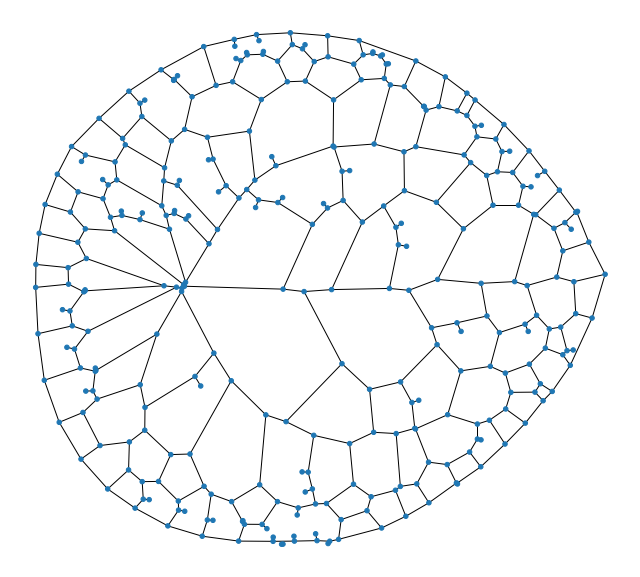

In [113]:
figure_save.quick_plot(G_vein, deposit_folder)

In [114]:
G_trim = trim_fake_edge(G_vein)

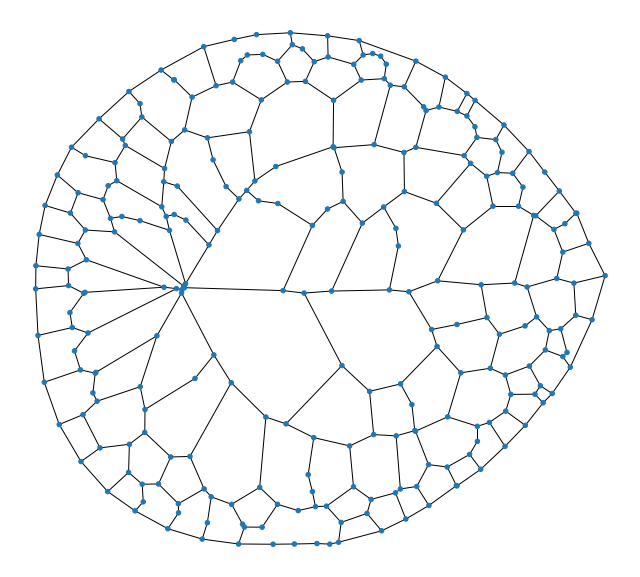

In [115]:
figure_save.quick_plot(G_trim, deposit_folder)

In [116]:
dot_list = np.array(dot_list)

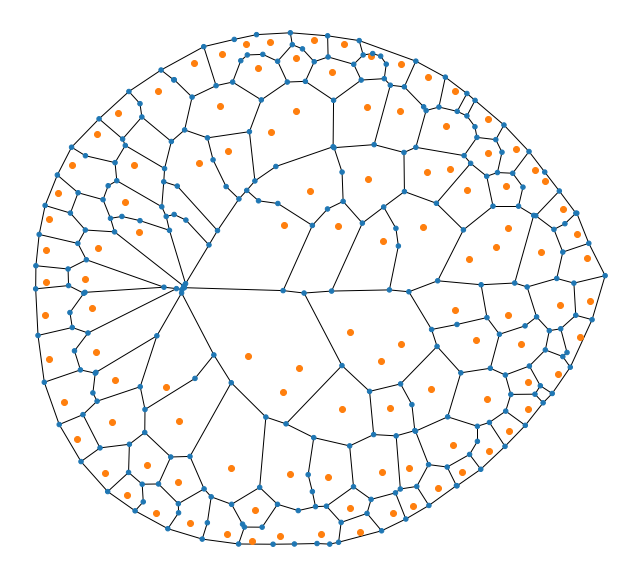

In [117]:
dot_vor = Voronoi(dot_list)
node_positions = {}
color_dict = {'vein':'C0', 'dot': 'C7', 'single_dot': 'C1'}
node_color = []

for node in G_trim.nodes:
    node_positions[node] = node
    node_color.append(color_dict[G_trim.nodes[node]['type']])

fig, ax = plt.subplots(figsize=(9, 9/G_trim.graph['ratio']))

nx.draw(G_trim, pos=node_positions, node_size= 20, node_color= node_color, ax = ax) 
# voronoi_plot_2d(dot_vor, show_vertices=False, line_colors='orange',
#                 line_width=2, line_alpha=0.6, point_size=2, ax = ax)
ax.scatter(dot_list[:,0], dot_list[:,1], color = 'C1')
plt.tight_layout()
plt.show()   
fig.savefig(f'{deposit_folder}/voronoi_seeding.pdf', dpi = 300)


In [118]:
G = graph_create.graph_creation(sample)

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.



In [119]:
bound_edges = [(G.graph['boundary'][i], G.graph['boundary'][(i+1)%len(G.graph['boundary'])]) for i in range(len(G.graph['boundary']))]

In [120]:
G_boundary = nx.Graph()
G_boundary.add_nodes_from(G.graph['boundary']) 
G_boundary.add_edges_from(bound_edges) 


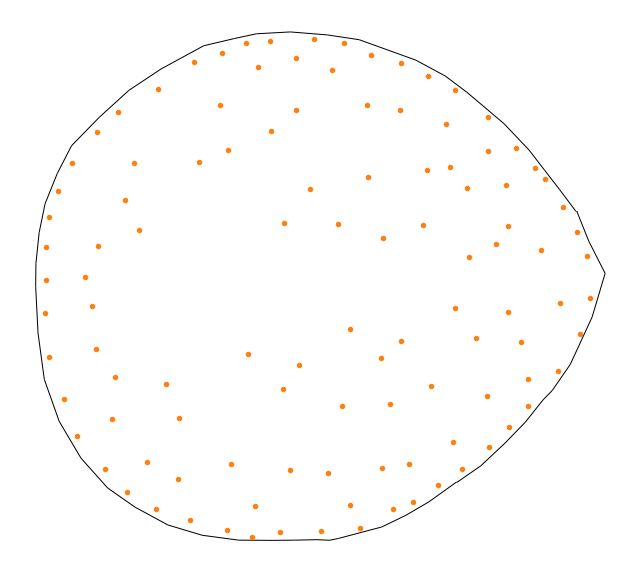

In [121]:
boundary_node_positions = {}
node_positions = {}

for node in G_boundary.nodes:
    boundary_node_positions[node] = node

for node in G_dot.nodes:
    node_positions[node] = node

fig, ax = plt.subplots(figsize=(9, 9/G.graph['ratio']))
nx.draw_networkx_edges(G_boundary, pos=boundary_node_positions, node_size= 20, ax = ax) 
nx.draw(G_dot, node_positions, node_size= 20, node_color = 'C1', ax = ax) 

plt.tight_layout()
plt.show()  

fig.savefig(f'{deposit_folder}/bounded_dots.pdf', dpi = 300)

#### Making voronoi demo for slides:

In [122]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]]) + np.random.uniform(-.3, .3, size= (9,2))
                
vor = Voronoi(points)

In [123]:
points[:,0]

array([ 0.2595522 , -0.27757168,  0.01804895,  1.14650433,  0.92120117,
        1.0446511 ,  2.13631813,  1.82774956,  1.90561968])

In [124]:
points[:,1]

array([ 0.18286303,  1.25964757,  2.17289188, -0.04936901,  0.85876736,
        1.77007951,  0.09730918,  0.93574749,  1.9365229 ])

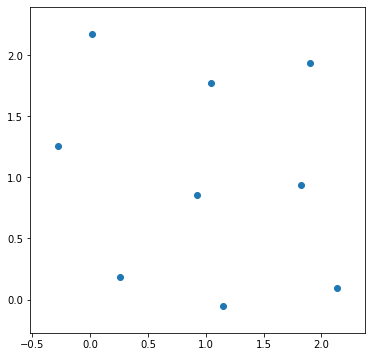

In [125]:
fig, ax = plt.subplots(figsize = (6,6))
voronoi_plot_2d(vor,             
                show_vertices=False,  
                line_width = 1.5,
                line_alpha = 0,
                point_size = 12, 
                ax = ax)               
plt.show()
fig.savefig(f'{deposit_folder}/seeds.pdf', dpi = 300)

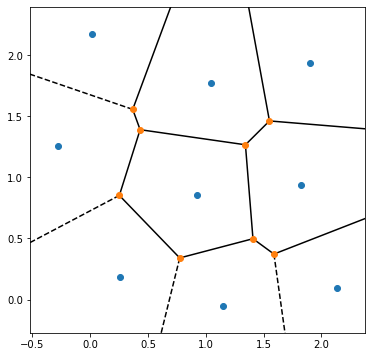

In [126]:
fig, ax = plt.subplots(figsize = (6,6))
voronoi_plot_2d(vor,                  
                line_width = 1.5,               
                point_size = 12, 
                ax = ax)               
plt.show()
fig.savefig(f'{deposit_folder}/seeds_plus_tessel.pdf', dpi = 300)

In [127]:
index = vor.regions[5] # select the middle polygon

In [128]:
polygon_verticies = np.array([vor.vertices[index[i]] for i in range(len(index))])

In [129]:
polygon_verticies

array([[1.55103428, 1.46069588],
       [4.02455261, 1.26823194],
       [1.55103428, 1.46069588],
       [1.14831296, 3.54386911]])

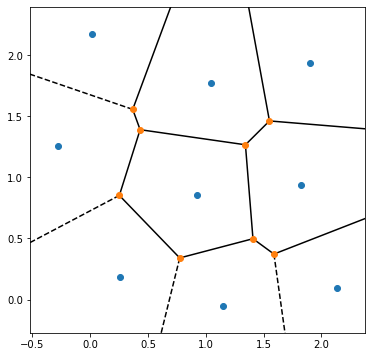

In [130]:
fig, ax = plt.subplots(figsize = (6,6))
voronoi_plot_2d(vor,                  
                line_width = 1.5,               
                point_size = 12, 
                ax = ax)  
poly = patches.Polygon(polygon_verticies, facecolor = 'C0' , alpha = .3)      
ax.add_patch(poly)

     
plt.show()
fig.savefig(f'{deposit_folder}/seeds_plus_highlight.pdf', dpi = 300)

In [131]:
area_df = pd.read_csv('test_results/PileaTLeaf2/PileaTLeaf2_area_test.csv')

In [132]:
area_df.describe()

,Unnamed: 0,dots,centroid,midpoint,random
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,0.727792,0.708482,0.658458,0.478536
std,26.124701,0.120014,0.102799,0.131670,0.143215
min,0.000000,0.284935,0.336831,0.247756,0.093410
25%,22.250000,0.667780,0.643030,0.594547,0.375428
50%,44.500000,0.751859,0.713095,0.683730,0.469361
75%,66.750000,0.820158,0.777792,0.752018,0.589375
max,89.000000,0.904898,0.909437,0.904502,0.843852
